In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, train_test_split

In [2]:
df=pd.read_csv('data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (1,11,13,14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,X,contact.name,creation.date,currency,description,duty,education,email,employment,...,logo,metro,name,phone,qualification,salary,schedule,text,update.date,vacancy
0,1,0,Лариса,2017-06-15 00:00:00 MSK,«руб.»,<p>Ответственность;</p>\n<p>Аккуратность;</p>\...,<p>регистрация и консультация клиентов;</p>\n<...,Среднее,NaN,Частичная занятость,...,NaN,NaN,ИП Богатых Надежда Николаевна,NaN,NaN,от 20000 до 25000,Вахтовый метод,NaN,2017-06-15 21:58:31 MSK,NaN
1,2,1,Гусев Павел Петрович,2017-06-15 00:00:00 MSK,«руб.»,<p>коммуникабельность;</p>\n<p>умение работать...,<p>&nbsp;</p>\n<p>работа с постоянными клиента...,Среднее профессиональное,NaN,Частичная занятость,...,NaN,NaN,ИП Гусев Павел Петрович,NaN,NaN,от 40000 до 45000,Сменный график,NaN,2017-06-15 21:20:53 MSK,NaN
2,4,3,Богатых Надежда Николаевна,2017-06-15 00:00:00 MSK,«руб.»,<p>Пунктуальность;</p>\n<p>Аккуратность;</p>\n...,<p>Работа с документами;</p>\n<p>Проведение пе...,NaN,NaN,Частичная занятость,...,NaN,NaN,ИП Богатых Надежда Николаевна,NaN,NaN,от 25000 до 30000,Гибкий график,NaN,2017-06-15 22:00:52 MSK,NaN
3,5,4,Прошин Владимир Сергеевич,2017-06-15 00:00:00 MSK,«руб.»,<p>ответственность;внимательность;пунктуальнос...,"<p>подбор персонала на сайтах,обработка электр...",Незаконченное высшее,NaN,Частичная занятость,...,NaN,NaN,ИП Прошин Владимир Сергеевич,NaN,NaN,от 20000 до 25000,Сменный график,Инвалиды,2017-06-15 22:23:00 MSK,NaN
4,6,5,Прошин Владимир Сергеевич,2017-06-15 00:00:00 MSK,«руб.»,<p>Ответственность;</p>\n<p>Аккуратность;</p>\...,<p>регистрация и консультация клиентов;</p>\n<...,Среднее,NaN,Удаленная,...,NaN,NaN,ИП Прошин Владимир Сергеевич,NaN,NaN,от 15000 до 20000,Гибкий график,Инвалиды,2017-06-15 22:23:05 MSK,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362440 entries, 0 to 362439
Data columns (total 26 columns):
Unnamed: 0       362440 non-null int64
X                362440 non-null object
contact.name     347660 non-null object
creation.date    362439 non-null object
currency         362440 non-null object
description      359844 non-null object
duty             358335 non-null object
education        341760 non-null object
email            307337 non-null object
employment       359661 non-null object
experience       297515 non-null object
hr.agency        362438 non-null object
industry         361560 non-null object
lat              360842 non-null object
lng              360842 non-null object
location         362438 non-null object
logo             12920 non-null object
metro            1187 non-null object
name             362437 non-null object
phone            324036 non-null object
qualification    341188 non-null object
salary           360783 non-null object
schedule     

In [5]:
df.drop(columns=['vacancy', 'X', 'Unnamed: 0'], inplace=True)

In [6]:
df.columns

Index(['contact.name', 'creation.date', 'currency', 'description', 'duty',
       'education', 'email', 'employment', 'experience', 'hr.agency',
       'industry', 'lat', 'lng', 'location', 'logo', 'metro', 'name', 'phone',
       'qualification', 'salary', 'schedule', 'text', 'update.date'],
      dtype='object')

In [7]:
df.describe().T

,count,unique,top,freq
contact.name,347660,92628,Кассай Ольга Юрьевна,2474
creation.date,362439,33,2017-06-26 00:00:00 MSK,35597
currency,362440,2,«руб.»,362438
description,359844,228299,Профессионально-квалифиционные требования уста...,1278
duty,358335,224110,"В СООТВ. С ДОЛЖ. ИНСТРУКЦИЕЙ, УТВЕРЖДЕННОЙ НА ...",3152
education,341760,6,Среднее профессиональное,135086
email,307337,88182,-,2181
employment,359661,9,Полная занятость,293925
experience,297515,26,от 0,148316
hr.agency,362438,6,False,296414


In [8]:
for i in df.columns:
    print('-----')
    print('Columns:', i)
    print(df[i].unique()[:5])
    print(df[i].value_counts()[:5])

-----
Columns: contact.name
['Лариса' 'Гусев Павел Петрович' 'Богатых Надежда Николаевна'
 'Прошин Владимир Сергеевич' 'Владимир Сергеевич']
Кассай Ольга Юрьевна                                             2474
Администратор зала (согласно утвержденного графика дежурства)    2282
Сабирова Рима Шамиловна                                          1900
Абрамова Наталья Петровна                                        1740
Склярова Савия Мударисовна, Виниченко Евгения Андреевна          1410
Name: contact.name, dtype: int64
-----
Columns: creation.date
['2017-06-15 00:00:00 MSK' '2017-06-16 00:00:00 MSK'
 '2017-06-14 00:00:00 MSK' '2017-06-07 00:00:00 MSK'
 '2017-06-02 00:00:00 MSK']
2017-06-26 00:00:00 MSK    35597
2017-06-23 00:00:00 MSK    30048
2017-06-15 00:00:00 MSK    23241
2017-06-21 00:00:00 MSK    23183
2017-06-27 00:00:00 MSK    22930
Name: creation.date, dtype: int64
-----
Columns: currency
['«руб.»' 'Полная занятость']
«руб.»              362438
Полная занятость         2
Name: 

['<p>регистрация и консультация клиентов;</p>\n<p>работа с письмами(отправка,прием,составление</p>\n<p>базы данных);</p>\n<p>прием и отправка корреспонденции.</p>'
 '<p>&nbsp;</p>\n<p>работа с постоянными клиентами;</p>\n<p>ведение переговоров и оформление договоров;</p>\n<p>создание и поддержание партнерских отношений;</p>\n<p>активный поиск клиентов,имеется готовая клиентская база.</p>'
 '<p>Работа с документами;</p>\n<p>Проведение первичных переговоров;</p>\n<p>Работа с входящими письмами и звонками;</p>\n<p>Делопроизводство.</p>'
 '<p>подбор персонала на сайтах,обработка электронных писем от кандидатов,проведение собеседований;составление и размещение вакансий в СМИ;проведение телефонных и личных интервью с соискателями;выполнение поручений руководителя.</p>'
 '<p>регистрация и консультация клиентов;</p>\n<p>работа с письмами(отправка,прием,составление</p>\n<p>базы данных);</p>\n<p>сопровождение клиентов на официальном сайте компании.</p>\n<p>&nbsp;</p>']
В СООТВ. С ДОЛЖ. ИНСТРУКЦИ

[nan 'Инвалиды'
 'Инвалиды\n<p>Высокий процент премии от личного вклада в увеличении товарооборота</p>'
 '<p>Высокий процент премии от товарооборота</p>'
 'Предоставляется жилье. Комната\nОплата проезда']
Социальный пакет                           100061
Инвалиды\nСоциальный пакет                   9394
Столовая                                     3459
Инфраструктурная доступность                 1685
Социальный пакет<br/>Доставка на работу      1286
Name: text, dtype: int64
-----
Columns: update.date
['2017-06-15 21:58:31 MSK' '2017-06-15 21:20:53 MSK'
 '2017-06-15 22:00:52 MSK' '2017-06-15 22:23:00 MSK'
 '2017-06-15 22:23:05 MSK']
2017-06-28 03:23:50 MSK    118
2017-06-28 03:44:15 MSK    115
2017-06-28 03:23:54 MSK    114
2017-06-28 03:19:18 MSK    114
2017-06-28 03:44:39 MSK    114
Name: update.date, dtype: int64


In [9]:
df['industry'].value_counts()

Производство                                                        115460
Здравоохранение, спорт, красота, социальное обеспечение              49448
Образование, наука                                                   28026
Продажи, закупки, снабжение, торговля                                25491
Консалтинг, стратегическое развитие, управление                      18798
Строительство, ремонт, стройматериалы, недвижимость                  16288
Транспорт, автобизнес, логистика, склад, ВЭД                         14728
Пищевая промышленность                                               13741
Работы, не требующие квалификации                                    11782
Сельское хозяйство, экология, ветеринария                             8748
Юриспруденция                                                         6476
Финансы, кредит, страхование, пенсионное обеспечение                  6007
Лесная, деревообрабатывающая, целлюлозно-бумажная промышленность      5360
ЖКХ, эксплуатация        

In [10]:
df.isna().sum()

contact.name      14780
creation.date         1
currency              0
description        2596
duty               4105
education         20680
email             55103
employment         2779
experience        64925
hr.agency             2
industry            880
lat                1598
lng                1598
location              2
logo             349520
metro            361253
name                  3
phone             38404
qualification     21252
salary             1657
schedule           3052
text              16442
update.date           4
dtype: int64

In [11]:
df['industry'].fillna('Пусто', inplace=True)

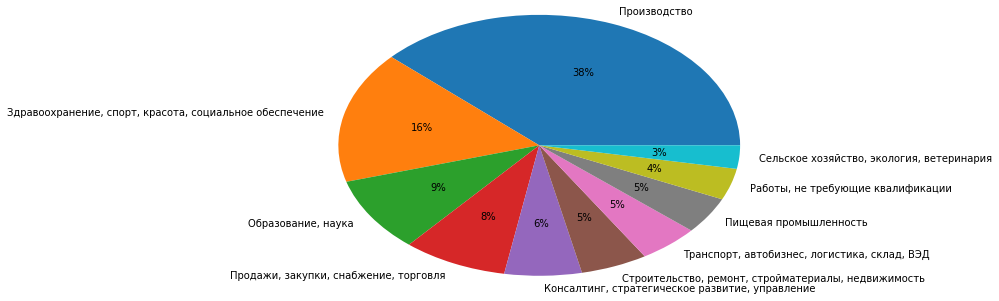

In [12]:
plt.pie(list(df['industry'].value_counts()[:10]), labels=list(df['industry'].value_counts()[:10].index), 
        radius=1.5, autopct='%.0f%%');

In [13]:
df['description'].unique()

array(['<p>Ответственность;</p>\n<p>Аккуратность;</p>\n<p>Пунктуальность.</p>',
       '<p>коммуникабельность;</p>\n<p>умение работать в команде;</p>\n<p>целеустремленность.</p>\n<p>&nbsp;</p>',
       '<p>Пунктуальность;</p>\n<p>Аккуратность;</p>\n<p>Позитивность;</p>\n<p>Стрессоустойчивость.</p>',
       ...,
       '<ul>\n<li>Среднее специальное либо высшее образование;</li>\n<li>Желателен опыт работы от 1 года в смежной сфере;</li>\n<li>Желание развиваться;</li>\n<li>Пользователь ПК;</li>\n<li>Ответственность, внимательность, обучаемость.</li>\n</ul>',
       '<p>Желательно опыт в продажах инструмента, запасных частей к автомобилям</p>',
       '<p>- Умение общаться с людьми, умение работать в команде;</p>\n<p>- Знание кассовой дисциплины;</p>\n<p>- Внимательность, аккуратность;</p>\n<p>- Опыт работы на должности продавца или менеджера по продажам приветствуется!</p>'],
      dtype=object)

### Текстовые столбцы - это qualification, text, description, duty

In [14]:
import re

In [15]:
re.sub(r'<[^>]*>|\\n|\&\w+|[:;,%#@!]', ' ', str(df['description']))

'0          Ответственность    Аккуратность  \\...\n1          коммуникабельность    умение работать...\n2          Пунктуальность    Аккуратность   ...\n3          ответственность внимательность пунктуальнос...\n4          Ответственность    Аккуратность  \\...\n5          наличие ПК и ежедневного выхода в интернет ...\n6          Пунктуальность    Аккуратность   ...\n7               пунктуальность    акку...\n8          - Аккуратный внешний вид   - Коммуник...\n9          - грамотная речь   - работа с ПК \\...\n10           образование высшее. Опыт работы главн...\n11              внимательность    пунк...\n12                           &...\n13            Городская Ветеринарная Клини...\n14            Городская Ветеринарная Клини...\n15            Городская Ветеринарная Клини...\n16         - высшее образование провизор    - на...\n17         Умение пользоваться ручным и электроинструм...\n18                           \n19         Наличие допуска для работы в условиях Крайн...\n20   

In [16]:
def prepr_text(txt):
    if type(txt) != str:
        return None
    else:
        return re.sub(r'<[^>]*>|\\n|\&\w+|[:;,%#@!]', ' ', txt)
    
text_cols=['qualification', 'text', 'description', 'duty']

for c in text_cols:
    df[c]=df[c].map(prepr_text)

In [17]:
df['description'].unique()

array([' Ответственность  \n Аккуратность  \n Пунктуальность. ',
       ' коммуникабельность  \n умение работать в команде  \n целеустремленность. \n    ',
       ' Пунктуальность  \n Аккуратность  \n Позитивность  \n Стрессоустойчивость. ',
       ...,
       ' \n Среднее специальное либо высшее образование  \n Желателен опыт работы от 1 года в смежной сфере  \n Желание развиваться  \n Пользователь ПК  \n Ответственность  внимательность  обучаемость. \n ',
       ' Желательно опыт в продажах инструмента  запасных частей к автомобилям ',
       ' - Умение общаться с людьми  умение работать в команде  \n - Знание кассовой дисциплины  \n - Внимательность  аккуратность  \n - Опыт работы на должности продавца или менеджера по продажам приветствуется  '],
      dtype=object)

In [18]:
df['industry'].unique()

array(['Административная работа, секретариат, АХО',
       'Продажи, закупки, снабжение, торговля',
       'Кадровая служба, управление персоналом', 'Маркетинг, реклама, PR',
       'Добывающая промышленность',
       'Сельское хозяйство, экология, ветеринария',
       'Здравоохранение, спорт, красота, социальное обеспечение',
       'Рабочие специальности',
       'Транспорт, автобизнес, логистика, склад, ВЭД',
       'Финансы, кредит, страхование, пенсионное обеспечение',
       'Производство', 'Образование, наука', 'Юриспруденция',
       'Строительство, ремонт, стройматериалы, недвижимость',
       'Лесная, деревообрабатывающая, целлюлозно-бумажная промышленность',
       'Работы, не требующие квалификации', 'ЖКХ, эксплуатация',
       'Государственная служба, некоммерческие организации',
       'Высший менеджмент',
       'Консалтинг, стратегическое развитие, управление',
       'Машиностроение',
       'Информационные технологии, телекоммуникации, связь',
       'Услуги населению

In [19]:
df['education'].unique()

array(['Среднее', 'Среднее профессиональное', nan, 'Незаконченное высшее',
       'Высшее', 'Образование, наука', 'Юриспруденция'], dtype=object)

In [20]:
df.loc[df.index[df['education'] == 'Юриспруденция']] = None

In [21]:
df['hr.agency'].unique()

array([False, True, None, 'false', 'true', nan,
       'Нижегородская область, 603035, г Нижний Новгород, ул Чаадаева, д. 2а'],
      dtype=object)

In [22]:
df.loc[df.index[df['hr.agency'] == 'Нижегородская область, 603035, г Нижний Новгород, ул Чаадаева, д. 2а']]

,contact.name,creation.date,currency,description,duty,education,email,employment,experience,hr.agency,...,location,logo,metro,name,phone,qualification,salary,schedule,text,update.date
279962,Высшее,+7(831)2160554,Полная занятость,от 0,false,"Образование, наука",Воспитатель,56.32775,43.855132,"Нижегородская область, 603035, г Нижний Новгор...",...,+7(831)2160554,Воспитатель группы продленного дня<br/>Ответст...,от 8900,adm.school66_nn@mail.ru,Социальный пакет,2017-06-28 04 10 59 MSK,https://trudvsem.ru/vacancy/card/1025202844963...,\n,None,NaN


In [23]:
df.drop(279962, inplace=True)

In [24]:
df['hr.agency'].unique()

array([False, True, None, 'false', 'true', nan], dtype=object)

In [25]:
df['hr.agency'].count()

358555

In [26]:
df.loc[df['hr.agency'] == 'true', 'hr.agency'] = True

In [27]:
df.isna().sum()

contact.name      18512
creation.date      3882
currency           3882
description        6443
duty               7939
education         24562
email             58424
employment         6661
experience        68106
hr.agency          3884
industry           3882
lat                5466
lng                5466
location           3884
logo             349668
metro            361265
name               3884
phone             41905
qualification     24909
salary             5522
schedule           6934
text              20140
update.date        3884
dtype: int64

In [28]:
df['lng'].unique()

array([37.575513, 37.370778, 35.002325, ..., 48.316975, 47.251186,
       39.774221000000004], dtype=object)

In [29]:
df['lat'].unique()

array([52.406193, 56.894468999999994, 53.110308999999994, ..., 54.337552,
       55.80909499999999, 64.554171], dtype=object)

In [30]:
df['lng'].fillna(-1, inplace=True)
df['lat'].fillna(-1, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362439 entries, 0 to 362439
Data columns (total 23 columns):
contact.name     343927 non-null object
creation.date    358557 non-null object
currency         358557 non-null object
description      355996 non-null object
duty             354500 non-null object
education        337877 non-null object
email            304015 non-null object
employment       355778 non-null object
experience       294333 non-null object
hr.agency        358555 non-null object
industry         358557 non-null object
lat              362439 non-null object
lng              362439 non-null object
location         358555 non-null object
logo             12771 non-null object
metro            1174 non-null object
name             358555 non-null object
phone            320534 non-null object
qualification    337530 non-null object
salary           356917 non-null object
schedule         355505 non-null object
text             342299 non-null object
update.date 

In [32]:
df['lng'].unique()

array([37.575513, 37.370778, 35.002325, ..., 48.316975, 47.251186,
       39.774221000000004], dtype=object)

In [33]:
df['lng'].describe()

count     362439
unique    111577
top           -1
freq        5466
Name: lng, dtype: int64

In [34]:
df['lng']=df['lng'].astype(float)

In [35]:
df['lat']=df['lat'].astype(float)

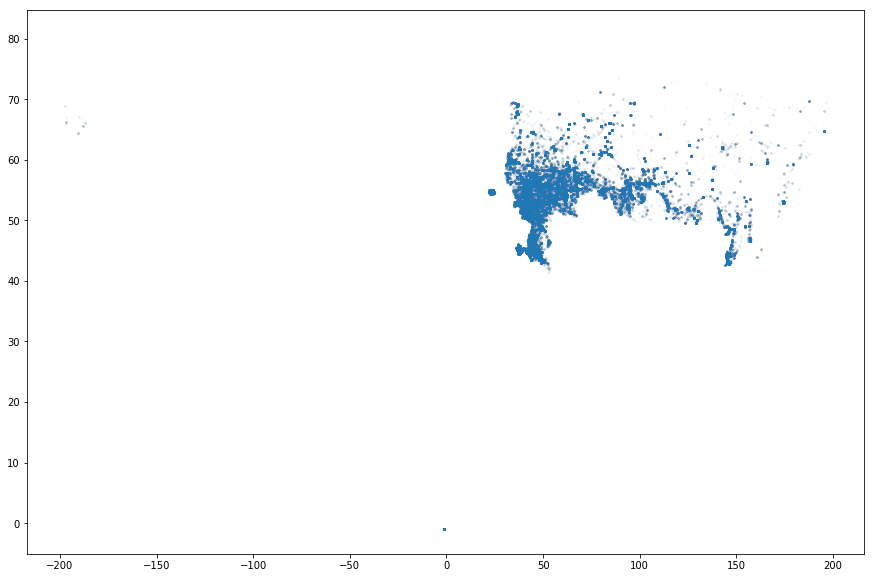

In [43]:
plt.figure(figsize=(15,10))
plt.scatter(df['lng']* 1.1, df['lat'], alpha=0.01, s=3 )

In [44]:
df.isna().sum()

contact.name      18512
creation.date      3882
currency           3882
description        6443
duty               7939
education         24562
email             58424
employment         6661
experience        68106
hr.agency          3884
industry           3882
lat                   0
lng                   0
location           3884
logo             349668
metro            361265
name               3884
phone             41905
qualification     24909
salary             5522
schedule           6934
text              20140
update.date        3884
dtype: int64

In [45]:
df['education'].unique()

array(['Среднее', 'Среднее профессиональное', nan, 'Незаконченное высшее',
       'Высшее', 'Образование, наука', None], dtype=object)

In [48]:
df.loc[df['education'] == 'Образование, наука'] = None

In [51]:
df['education'].unique()

array(['Среднее', 'Среднее профессиональное', 'Пусто',
       'Незаконченное высшее', 'Высшее'], dtype=object)

In [50]:
df['education'].fillna("Пусто", inplace=True)

In [52]:
df.employment.unique()

array(['Частичная занятость', 'Удаленная', 'Временная',
       'Полная занятость', 'Сезонная', 'Не указано', 'Стажировка', None,
       '52.552041', '56.32775', nan], dtype=object)

In [73]:
df.loc[df['employment'] == '52.552041'] = None

In [68]:
df.loc[df['employment'] == '56.32775'] = None

In [69]:
df.schedule.unique()

array(['Вахтовый метод', 'Сменный график', 'Гибкий график', '\n    ',
       'Полный рабочий день', 'Неполный рабочий день', 'Пусто',
       'Не указано', 'Ненормированный рабочий день', None], dtype=object)

In [61]:
df.industry.fillna("Пусто", inplace=True)
df.education.fillna("Пусто", inplace=True)
df.schedule.fillna("Пусто", inplace = True)
df.employment.fillna("unknown", inplace=True)

In [80]:
ras_cols=['industry', 'education', 'employment', 'schedule']

In [86]:
ras_cols_df=df[['industry', 'education', 'employment', 'schedule']]

In [91]:
df.education.unique()

array(['Среднее', 'Среднее профессиональное', 'Пусто',
       'Незаконченное высшее', 'Высшее'], dtype=object)

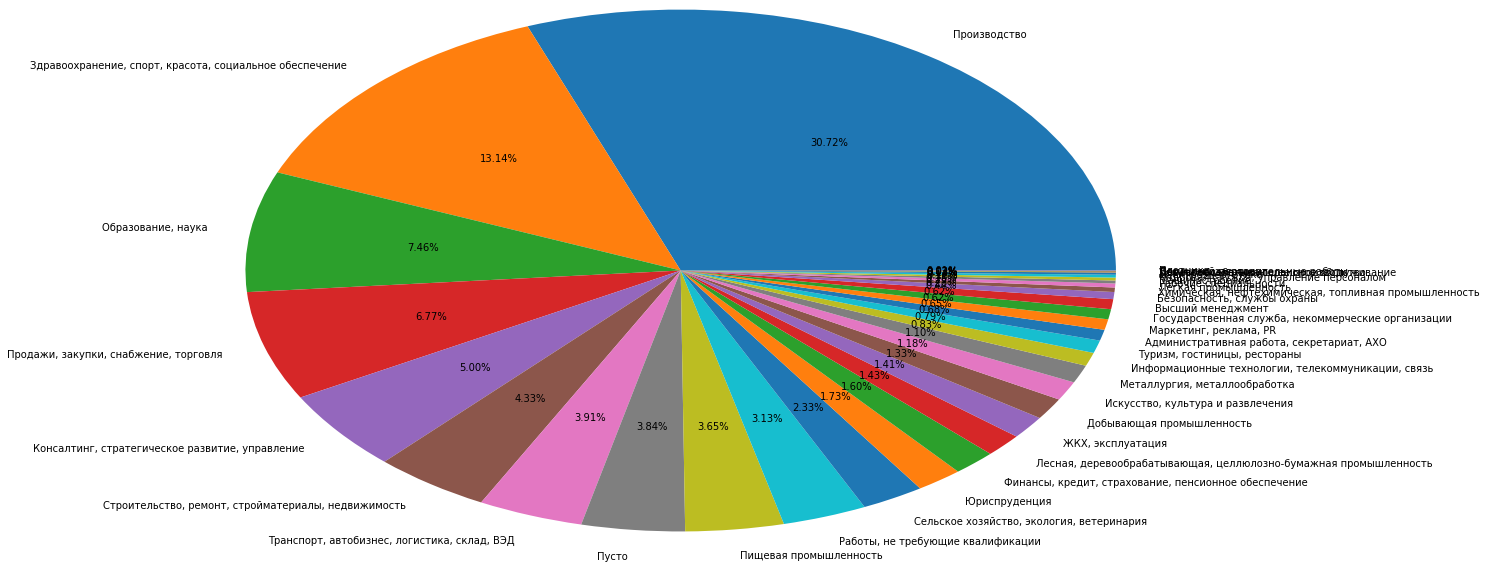

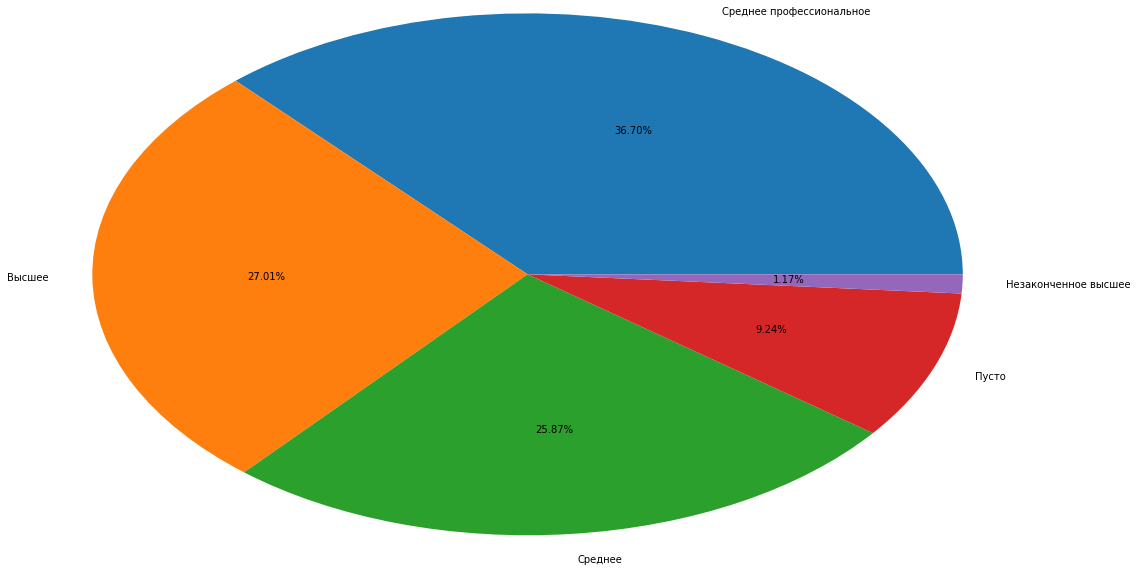

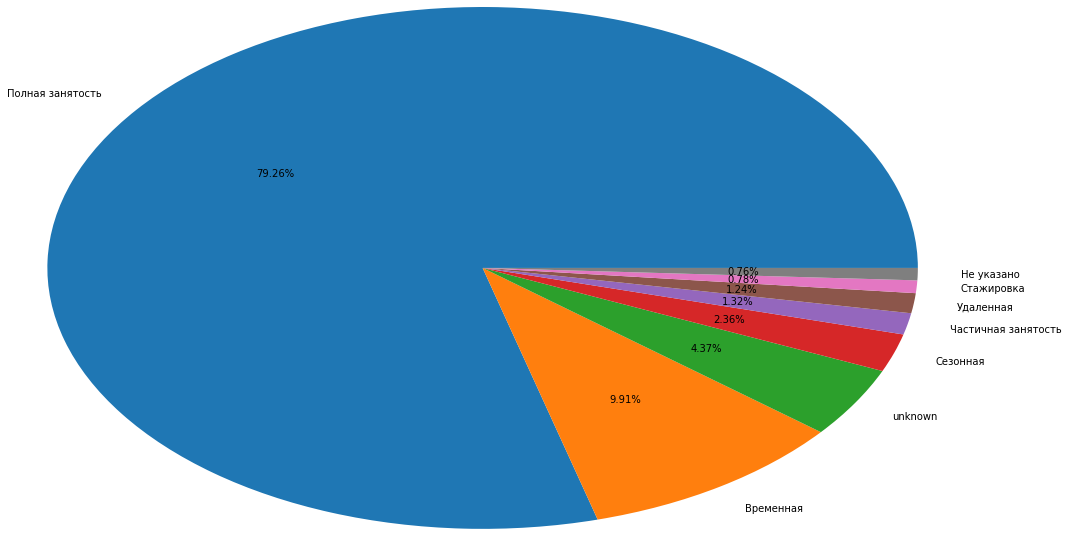

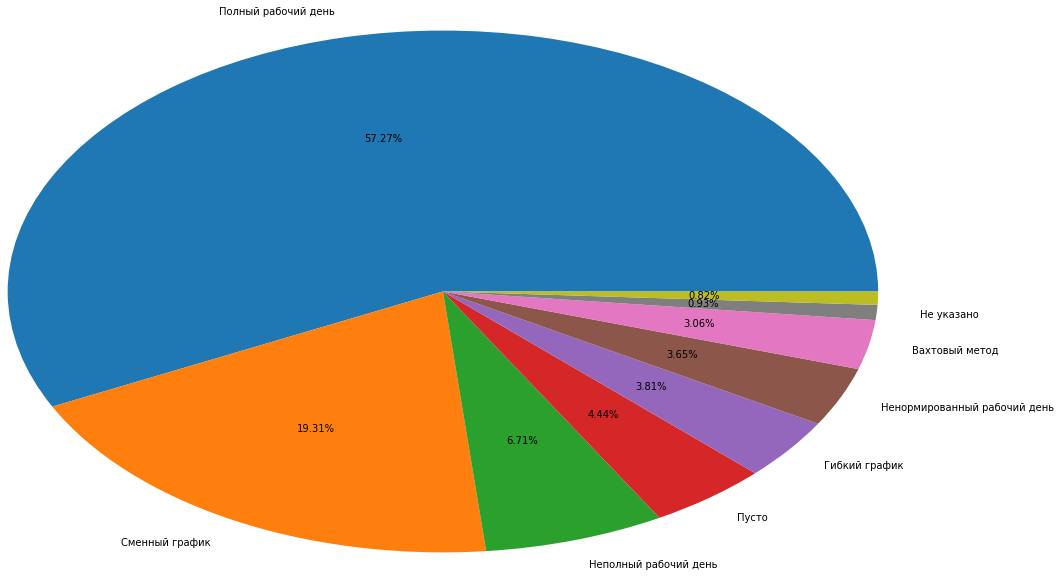

In [93]:
for c in ras_cols:
    plt.subplots(figsize=(13,8))
    plt.pie(df[c].value_counts(), labels=df[c].value_counts().index, radius=1.5, autopct='%.2f%%')

# Влияние значащих переменных на зависимую

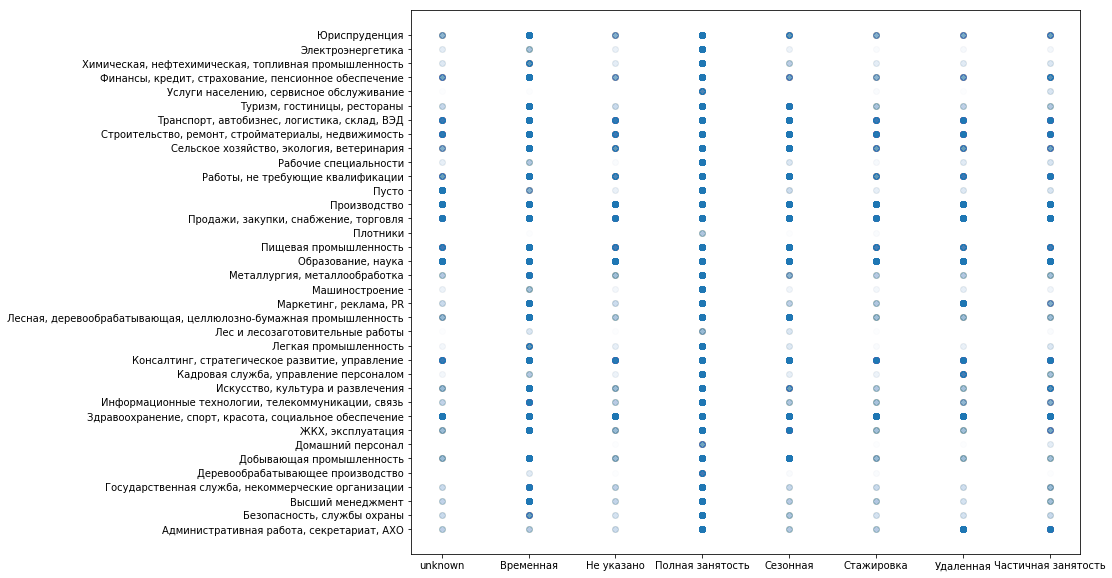

In [94]:
plt.figure(figsize=(12,10))
plt.scatter(df['employment'], df['industry'], alpha=0.01)

In [95]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [96]:
y_pred=[1,0,2,3,1,1]
y_test=[1,1,1,3,1,1]

In [97]:
accuracy_score(y_test, y_pred)

0.6666666666666666

# Кодирование целевой переменной

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
le=LabelEncoder()

In [102]:
industry_le=le.fit(df['industry'])

In [103]:
df['industry_le']=le.fit_transform(df['industry'])

In [106]:
df['industry_le'].head(10)

0     0
1    22
2     0
3    11
4     0
5    22
6     0
7     0
8    16
9    22
Name: industry_le, dtype: int64

In [107]:
df['ind']=industry_le.inverse_transform(df['industry_le'])

In [108]:
df['ind'][:10]

0    Административная работа, секретариат, АХО
1        Продажи, закупки, снабжение, торговля
2    Административная работа, секретариат, АХО
3       Кадровая служба, управление персоналом
4    Административная работа, секретариат, АХО
5        Продажи, закупки, снабжение, торговля
6    Административная работа, секретариат, АХО
7    Административная работа, секретариат, АХО
8                       Маркетинг, реклама, PR
9        Продажи, закупки, снабжение, торговля
Name: ind, dtype: object

In [112]:
ras_cols_df.drop(columns='industry',inplace=True)

KeyError: "['industry'] not found in axis"

In [113]:
ras_cols_df.head()

,education,employment,schedule
0,Среднее,Частичная занятость,Вахтовый метод
1,Среднее профессиональное,Частичная занятость,Сменный график
2,Пусто,Частичная занятость,Гибкий график
3,Незаконченное высшее,Частичная занятость,Сменный график
4,Среднее,Удаленная,Гибкий график


In [114]:
ras_cols_dummies=pd.get_dummies(ras_cols_df)

In [115]:
ras_cols_dummies.head()

,education_Высшее,education_Незаконченное высшее,education_Пусто,education_Среднее,education_Среднее профессиональное,employment_unknown,employment_Временная,employment_Не указано,employment_Полная занятость,employment_Сезонная,...,employment_Частичная занятость,schedule_,schedule_Вахтовый метод,schedule_Гибкий график,schedule_Не указано,schedule_Ненормированный рабочий день,schedule_Неполный рабочий день,schedule_Полный рабочий день,schedule_Пусто,schedule_Сменный график
0,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [116]:
ras_cols_dummies['industry_le']=df['industry_le']

In [117]:
ras_cols_dummies.corr()

,education_Высшее,education_Незаконченное высшее,education_Пусто,education_Среднее,education_Среднее профессиональное,employment_unknown,employment_Временная,employment_Не указано,employment_Полная занятость,employment_Сезонная,...,schedule_,schedule_Вахтовый метод,schedule_Гибкий график,schedule_Не указано,schedule_Ненормированный рабочий день,schedule_Неполный рабочий день,schedule_Полный рабочий день,schedule_Пусто,schedule_Сменный график,industry_le
education_Высшее,1.000000,-0.066310,-0.194110,-0.359449,-0.463224,-0.105280,-0.060909,0.002597,0.115721,-0.046198,...,0.001681,-0.045299,-0.012534,0.002086,0.044463,0.011632,0.144338,-0.104719,-0.129772,-0.243242
education_Незаконченное высшее,-0.066310,1.000000,-0.034775,-0.064395,-0.082986,-0.023169,-0.001428,-0.008945,0.020506,-0.005638,...,-0.009056,-0.004325,-0.000537,-0.009500,-0.004141,-0.001370,0.016520,-0.023379,0.000863,-0.005588
education_Пусто,-0.194110,-0.034775,1.000000,-0.188503,-0.242925,0.547396,0.046161,-0.012330,-0.319148,-0.023929,...,-0.013050,0.000742,0.010456,-0.013969,-0.039391,0.068341,-0.173374,0.541970,-0.089250,0.067343
education_Среднее,-0.359449,-0.064395,-0.188503,1.000000,-0.449844,-0.104170,0.048339,0.001863,-0.000278,0.049553,...,0.002114,0.022264,0.018313,0.005558,-0.014386,0.003989,-0.062652,-0.102365,0.115834,0.219500
education_Среднее профессиональное,-0.463224,-0.082986,-0.242925,-0.449844,1.000000,-0.132057,-0.015224,0.005322,0.080806,0.013171,...,0.006394,0.022024,-0.011254,0.003544,-0.003299,-0.055094,0.024425,-0.130906,0.067734,-0.014565
employment_unknown,-0.105280,-0.023169,0.547396,-0.104170,-0.132057,1.000000,-0.070883,-0.018698,-0.417775,-0.033226,...,-0.019430,-0.032462,-0.036878,-0.020580,-0.034761,-0.048021,-0.198512,0.809171,-0.085200,0.101282
employment_Временная,-0.060909,-0.001428,0.046161,0.048339,-0.015224,-0.070883,1.000000,-0.029016,-0.648316,-0.051561,...,0.001186,0.001507,-0.001715,-0.000813,0.015458,0.109866,-0.008207,-0.056104,-0.037290,0.067571
employment_Не указано,0.002597,-0.008945,-0.012330,0.001863,0.005322,-0.018698,-0.029016,1.000000,-0.171015,-0.013601,...,-0.007954,-0.002797,-0.001133,-0.007158,-0.000083,0.000427,0.008562,-0.018866,0.004215,-0.002716
employment_Полная занятость,0.115721,0.020506,-0.319148,-0.000278,0.080806,-0.417775,-0.648316,-0.171015,1.000000,-0.303893,...,0.016924,0.013441,-0.046493,0.017078,-0.000972,-0.073940,0.128460,-0.335303,0.070022,-0.081964
employment_Сезонная,-0.046198,-0.005638,-0.023929,0.049553,0.013171,-0.033226,-0.051561,-0.013601,-0.303893,1.000000,...,-0.003651,0.016108,0.036598,-0.003528,0.027893,-0.019157,-0.016922,-0.028408,0.011848,0.030714


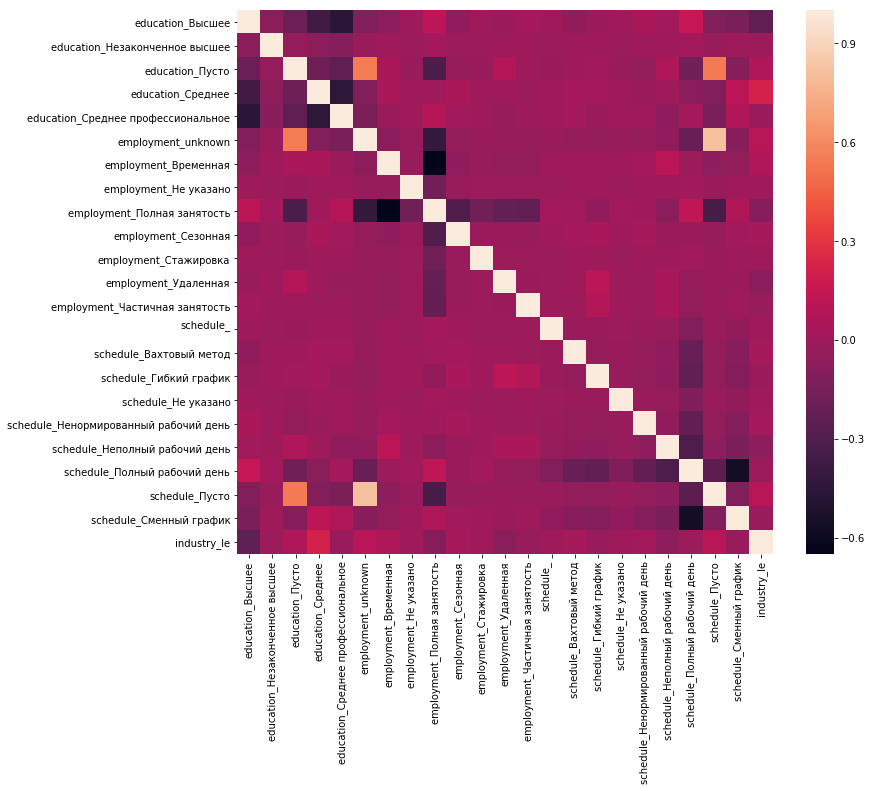

In [119]:
plt.figure(figsize=(12,10))
sns.heatmap(ras_cols_dummies.corr())

# Обработка текстовых переменных

In [128]:
text_cols

['qualification', 'text', 'description', 'duty']

In [143]:
df['qualification'].isna().sum()

33558

In [145]:
df['qualification'].fillna("Пусто", inplace=True)

In [146]:
df['text'].isna().sum()

28914

In [147]:
df['text'].fillna("Пусто", inplace=True)

In [148]:
df['description'].fillna("Пусто", inplace=True)

In [149]:
df['duty'].fillna("Пусто", inplace=True)

In [150]:
txt_col=df[['qualification', 'text', 'description', 'duty']]

In [151]:
txt_col.head()

,qualification,text,description,duty
0,Пусто,Пусто,Ответственность \n Аккуратность \n Пунктуал...,регистрация и консультация клиентов \n работ...
1,Пусто,Пусто,коммуникабельность \n умение работать в кома...,\n работа с постоянными клиентами \n веде...
2,Пусто,Пусто,Пунктуальность \n Аккуратность \n Позитивно...,Работа с документами \n Проведение первичных...
3,Пусто,Инвалиды,ответственность внимательность пунктуальность.,подбор персонала на сайтах обработка электрон...
4,Пусто,Инвалиды,Ответственность \n Аккуратность \n Пунктуал...,регистрация и консультация клиентов \n работ...


In [238]:
def prepr_text(txt):
    if type(txt) != str:
        return None
    else:
        return re.sub(r'<[^>]*>|\\n|\&\w+|[:;,%#@!+...]|(\n)|\.', ' ', txt)
    
text_cols=['qualification', 'text', 'description', 'duty']

for c in text_cols:
    txt_col[c]=txt_col[c].map(prepr_text)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [236]:
txt_col.head()

,qualification,text,description,duty
0,Пусто,Пусто,Ответственность Аккуратность Пунктуальн...,регистрация и консультация клиентов работа...
1,Пусто,Пусто,коммуникабельность умение работать в коман...,работа с постоянными клиентами ведени...
2,Пусто,Пусто,Пунктуальность Аккуратность Позитивност...,Работа с документами Проведение первичных ...
3,Пусто,Инвалиды,ответственность внимательность пунктуальность,подбор персонала на сайтах обработка электрон...
4,Пусто,Инвалиды,Ответственность Аккуратность Пунктуальн...,регистрация и консультация клиентов работа...


In [241]:
txt_col['description'].unique()

array([' Ответственность    Аккуратность    Пунктуальность  ',
       ' коммуникабельность    умение работать в команде    целеустремленность       ',
       ' Пунктуальность    Аккуратность    Позитивность    Стрессоустойчивость  ',
       ...,
       '   Среднее специальное либо высшее образование    Желателен опыт работы от 1 года в смежной сфере    Желание развиваться    Пользователь ПК    Ответственность  внимательность  обучаемость    ',
       ' Желательно опыт в продажах инструмента  запасных частей к автомобилям ',
       ' - Умение общаться с людьми  умение работать в команде    - Знание кассовой дисциплины    - Внимательность  аккуратность    - Опыт работы на должности продавца или менеджера по продажам приветствуется  '],
      dtype=object)

In [225]:
from sklearn.feature_extraction.text import CountVectorizer

In [226]:
cvv=CountVectorizer(ngram_range=(1,2), max_features=100)

In [227]:
cvv_fit=cvv.fit(txt_col['qualification'])

In [228]:
cvv_trans=cvv.transform(txt_col['qualification'])

In [229]:
cvv_fit.vocabulary_

{'пусто': 67,
 'требуется': 84,
 'по': 62,
 'отдела': 61,
 'для': 15,
 'на': 43,
 'врач': 4,
 'водительское': 2,
 'удостоверение': 89,
 'категории': 26,
 'требуется водительское': 85,
 'водительское удостоверение': 3,
 'удостоверение категории': 91,
 'работа': 68,
 'ооо': 50,
 'работы': 72,
 'дисциплинированность': 11,
 'ответственность': 56,
 'дисциплинированность ответственность': 13,
 'условия': 95,
 'работать': 70,
 'коммуникабельность': 34,
 'коммуникабельность ответственность': 36,
 'умение': 93,
 'команде': 31,
 'ответственность коммуникабельность': 58,
 'коммуникабельность умение': 37,
 'умение работать': 94,
 'работать команде': 71,
 '00': 0,
 'до': 16,
 'от': 55,
 'неделя': 45,
 'пунктуальность': 64,
 'пунктуальность ответственность': 66,
 'специалист': 81,
 'команде ответственность': 33,
 'наличие': 44,
 'гарантированное': 9,
 'собеседование': 78,
 'инициативность': 20,
 'гарантированное собеседование': 10,
 'рабочее': 74,
 'место': 40,
 'рабочее место': 75,
 'опыт': 51,
 'о

In [230]:
len(cvv_fit.vocabulary_)

100

In [242]:
def text_vec(col):
    co_vect=CountVectorizer()
    co_vect_fit=cvv.fit(txt_col[col])
    co_vect_trans=cvv.transform(txt_col[col])
    
    return co_vect_fit, co_vect_trans

In [245]:
description, description_c = text_vec(txt_col['description'])
qualification, qualification_c = text_vec(txt_col['qualification'])
duty,duty_c = text_vec(txt_col['duty'])
text, text_c=text_vec(txt_col['text'])

KeyError: "[' Ответственность    Аккуратность    Пунктуальность  '\n ' коммуникабельность    умение работать в команде    целеустремленность       '\n ' Пунктуальность    Аккуратность    Позитивность    Стрессоустойчивость  '\n ...\n ' Желательно опыт в продажах инструмента  запасных частей к автомобилям '\n ' Если ты ответственный и нацелен на результат  готов создавать кулинарные шедевры и развиваться  знаешь нормы СанПин  - приглашаем тебя в команду Киты еды  '\n ' - Умение общаться с людьми  умение работать в команде    - Знание кассовой дисциплины    - Внимательность  аккуратность    - Опыт работы на должности продавца или менеджера по продажам приветствуется  '] not in index"

In [217]:
print(cvv.get_feature_names)

<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)>


In [204]:
len(cvv.vocabulary_)

4

In [206]:
print(cvv_fit.get_feature_names)

<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)>


# Нормальный COUNT VECTORIZER

In [255]:
CV=CountVectorizer()

In [256]:
cv_qualif=CV.fit(txt_col['qualification'])

In [257]:
cv_tr_qualif=CV.transform(txt_col['qualification'])

In [259]:
len(cv_qualif.vocabulary_)

52443

In [261]:
qualification_df=pd.DataFrame(cv_tr_qualif.toarray(),columns=cv_qualif.vocabulary_.keys())

MemoryError: 

# Делаем модельку

In [176]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier

In [177]:
ras_cols_dummies.head()

,education_Высшее,education_Незаконченное высшее,education_Пусто,education_Среднее,education_Среднее профессиональное,employment_unknown,employment_Временная,employment_Не указано,employment_Полная занятость,employment_Сезонная,...,schedule_,schedule_Вахтовый метод,schedule_Гибкий график,schedule_Не указано,schedule_Ненормированный рабочий день,schedule_Неполный рабочий день,schedule_Полный рабочий день,schedule_Пусто,schedule_Сменный график,industry_le
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,22
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,11
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [179]:
y=ras_cols_dummies['industry_le']

In [180]:
df_train=ras_cols_dummies.drop(columns='industry_le')

In [266]:
X_train, X_test, y_train, y_test = train_test_split(df_train, le.inverse_transform(y), test_size=0.1, random_state=42)

In [267]:
forest=RandomForestClassifier()

In [268]:
%%time
forest.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 2.12 s, sys: 16.1 ms, total: 2.14 s
Wall time: 2.13 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [269]:
accuracy_score(y_test, forest.predict(X_test))

0.3654122061582607

In [270]:
forest_pred=forest.predict(X_test)

In [271]:
forest_pred[:10]

array(['Производство',
       'Здравоохранение, спорт, красота, социальное обеспечение',
       'Производство', 'Производство', 'Производство', 'Производство',
       'Пусто', 'Производство', 'Производство', 'Производство'],
      dtype=object)

In [186]:
#inverse=industry_le.inverse_transform(forest_pred)

In [189]:
#inverse[:10]

array(['Производство',
       'Здравоохранение, спорт, красота, социальное обеспечение',
       'Производство', 'Производство', 'Производство', 'Производство',
       'Пусто', 'Производство', 'Производство', 'Производство'],
      dtype=object)

In [218]:
import csv

In [219]:
predict=pd.DataFrame(forest_pred)

In [220]:
predict.to_csv('predict.csv', index=False)

# Веб-приложение

In [263]:
import pickle

In [272]:
pickle.dump(forest, open('forest_pred.pkl', 'wb'), protocol=4)

In [273]:
for_pr=pickle.load(open('forest_pred.pkl', 'rb'))

In [ ]:
for_pr.predict(np.array(